In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandasql import sqldf
from scipy.stats import lognorm

pysqldf = lambda q: sqldf(q, globals())

def LogNormbyAvgStdNum(row):
    
    avg=row["avg"]
    std=row["std"]
    num=row["payment"]

    var=std*std
    sigma2=np.log(1+(var/(avg*avg)))
    sigma =np.sqrt(sigma2)
    mu = np.log(avg)-(.5*sigma)
    
    r = lognorm.rvs(sigma, loc=0,scale=np.exp(mu), size=num)
    return r

In [46]:
folder = "../dataset/"
#basic_stats
names=['zipcode','date','category','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
basic_stats = pd.io.parsers.read_table(folder + 'basic_stats000',sep='\t', names=names, parse_dates=["date"])

#gender distribution
names=['zipcode','date','category','gender','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
gender_distribution = pd.io.parsers.read_table(folder + 'gender_distribution000',sep='\t', names=names, parse_dates=["date"])

In [47]:
basic_stats_restaurants=basic_stats[basic_stats["category"]=="es_barsandrestaurants"]
gender_distribution_restaurants=gender_distribution[gender_distribution["category"]=="es_barsandrestaurants"]
basic_stats_restaurants[3:4]

,zipcode,date,category,merchant,card,payment,avg,max,min,std
33,8001,2014-07-04,es_barsandrestaurants,89,447,457,25.51,187,1.1,23.913212


In [58]:
gender_distribution_restaurants_34=gender_distribution_restaurants[gender_distribution_restaurants["zipcode"]==8001]
gender_distribution_restaurants_34=gender_distribution_restaurants_34[gender_distribution_restaurants_34["date"]=="2014-07-04"]
gender_distribution_restaurants_34
#gender_distribution_restaurants_34.ix[22494]

,zipcode,date,category,gender,merchant,card,payment,avg,max,min,std
22494,8001,2014-07-04,es_barsandrestaurants,unknown,27,303,309,25.51,118.75,1.1,19.952131
53924,8001,2014-07-04,es_barsandrestaurants,female,41,53,55,24.57,137.60,3.0,22.800214
67406,8001,2014-07-04,es_barsandrestaurants,male,53,77,79,29.15,187.00,3.0,36.303650
72030,8001,2014-07-04,es_barsandrestaurants,enterprise,7,14,14,8.62,27.25,1.6,6.107891


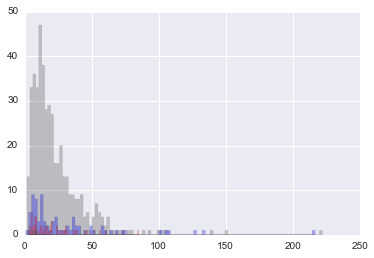

In [62]:
row=basic_stats_restaurants.ix[33]
row_unknown = gender_distribution_restaurants_34.ix[22494]
row_female = gender_distribution_restaurants_34.ix[53924]
row_male = gender_distribution_restaurants_34.ix[67406]
row_enterprise = gender_distribution_restaurants_34.ix[72030]


fig, ax = plt.subplots(1, 1)
ax.hist(LogNormbyAvgStdNum(row),  bins=100, histtype='stepfilled', color='black', alpha=0.2)
ax.hist(LogNormbyAvgStdNum(row_male),  bins=100, histtype='stepfilled', color='blue', alpha=0.3)
ax.hist(LogNormbyAvgStdNum(row_female),  bins=100, histtype='stepfilled', color='red', alpha=0.3)
ax.hist(LogNormbyAvgStdNum(row_enterprise),  bins=100, histtype='stepfilled', color='yellow', alpha=0.3)

plt.show()

In [88]:
cut100_gender_distribution_restaurants=gender_distribution_restaurants[:100]
cut100_gender_distribution_restaurants["distribution"] = ""
for i in cut100_gender_distribution_restaurants.index:
    cut100_gender_distribution_restaurants["distribution"][i] = LogNormbyAvgStdNum(cut100_gender_distribution_restaurants.ix[i])

/Users/x/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/x/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


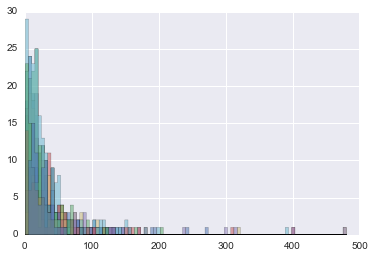

In [90]:
cut100_gender_distribution_restaurants_male=cut100_gender_distribution_restaurants[cut100_gender_distribution_restaurants["gender"]=="male"]

cut100_gender_distribution_restaurants_male
fig, ax = plt.subplots(1, 1)
ax.hist(cut100_gender_distribution_restaurants_male["distribution"], bins=100, histtype='stepfilled',  alpha=0.5)

plt.show()


In [93]:
cut100_gender_distribution_restaurants_female=cut100_gender_distribution_restaurants[cut100_gender_distribution_restaurants["gender"]=="female"]
cut100_gender_distribution_restaurants_female




,zipcode,date,category,gender,merchant,card,payment,avg,max,min,std,distribution
8,8001,2014-07-27,es_barsandrestaurants,female,33,45,47,26.37,103.40,1.50,20.102990,"[43.1818628059, 29.9470395686, 14.3600232708, ..."
15,8001,2014-07-10,es_barsandrestaurants,female,38,57,59,31.35,544.10,4.75,70.189018,"[13.1878541979, 80.1620829974, 9.70680394996, ..."
30,8001,2014-07-08,es_barsandrestaurants,female,31,51,52,18.56,110.00,1.55,18.319765,"[17.9883268749, 7.82590023054, 7.37099077328, ..."
91,8003,2014-07-23,es_barsandrestaurants,female,49,58,59,36.53,184.50,1.20,33.860349,"[20.1232213509, 20.4539675785, 24.9540585433, ..."
107,8003,2014-07-16,es_barsandrestaurants,female,44,54,54,42.69,349.30,2.40,59.370255,"[111.804230907, 5.6864710457, 120.119349685, 1..."
111,8004,2014-07-23,es_barsandrestaurants,female,13,17,18,27.38,204.66,1.20,44.121015,"[2.46384733604, 4.78387048027, 61.57815304, 41..."
116,8004,2014-07-06,es_barsandrestaurants,female,22,32,33,24.70,103.15,3.00,20.938663,"[23.2068687676, 73.561922779, 36.5964933845, 3..."
119,8004,2014-07-11,es_barsandrestaurants,female,23,34,35,32.00,107.64,4.00,29.626098,"[23.5785525209, 19.5049901084, 9.35830254613, ..."
131,8004,2014-07-14,es_barsandrestaurants,female,15,16,18,43.01,400.00,4.50,88.511854,"[57.1849540165, 32.2030370221, 87.2224287382, ..."
222,8007,2014-07-24,es_barsandrestaurants,female,47,93,94,19.95,87.70,1.00,17.615143,"[18.0802031248, 14.0527557258, 5.60460526476, ..."


In [94]:
demographic_distribution_restaurants=demographic_distribution[demographic_distribution["category"]=="es_barsandrestaurants"]

In [96]:
demographic_distribution_restaurants[1:2]

,zipcode,date,category,ageinterval,gender,merchant,card,payment,avg,max,min,std,amount
5,8001,2014-07-02,es_barsandrestaurants,unknown,enterprise,8,15,15,6.53,18.35,1.2,4.216982,97.95


In [99]:
basic_stats_restaurants_08001=basic_stats_restaurants[basic_stats_restaurants["zipcode"]==8001]

In [102]:
basic_stats_restaurants_08001

,zipcode,date,category,merchant,card,payment,avg,max,min,std
0,8001,2014-07-01,es_barsandrestaurants,76,405,410,27.28,600.00,0.10,47.253606
11,8001,2014-07-02,es_barsandrestaurants,83,453,462,23.92,212.07,1.20,24.647023
22,8001,2014-07-03,es_barsandrestaurants,90,488,494,24.31,433.97,1.20,31.333026
33,8001,2014-07-04,es_barsandrestaurants,89,447,457,25.51,187.00,1.10,23.913212
44,8001,2014-07-05,es_barsandrestaurants,96,416,422,35.10,400.55,1.00,34.073809
55,8001,2014-07-06,es_barsandrestaurants,62,319,326,31.50,156.95,2.50,26.269450
61,8001,2014-07-07,es_barsandrestaurants,70,414,427,21.95,144.00,0.40,21.451391
72,8001,2014-07-08,es_barsandrestaurants,86,405,413,26.52,251.24,1.15,32.626633
83,8001,2014-07-09,es_barsandrestaurants,89,441,448,25.42,330.00,1.20,27.837429
94,8001,2014-07-10,es_barsandrestaurants,98,444,454,26.14,544.10,2.00,39.702323


In [103]:
basic_stats_restaurants_08001["distribution"] = ""
for i in basic_stats_restaurants_08001.index:
    basic_stats_restaurants_08001["distribution"][i] = LogNormbyAvgStdNum(basic_stats_restaurants_08001.ix[i])

/Users/x/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/x/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


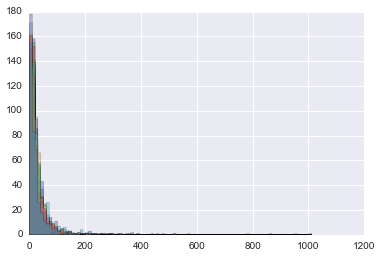

In [104]:

fig, ax = plt.subplots(1, 1)
ax.hist(basic_stats_restaurants_08001["distribution"], bins=100, histtype='stepfilled',  alpha=0.5)

plt.show()

In [112]:
total= np.hstack(basic_stats_restaurants_08001["distribution"])

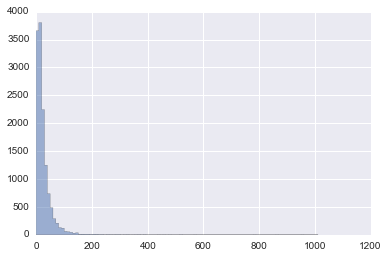

In [114]:
fig, ax = plt.subplots(1, 1)
ax.hist(total, bins=100, histtype='stepfilled',  alpha=0.5)
plt.show()